In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
diamond = train.drop("Unnamed: 0" , axis =1)
diamond_unnamed = train["Unnamed: 0"].copy

In [ ]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,43013.000000,43013.000000,43013.000000,43013.000000,43013.000000,43013.000000,43013.000000
mean,0.795941,61.745723,57.438911,3937.960803,5.723883,5.727511,3.535111
std,0.478706,1.434467,2.239499,4017.288883,1.128171,1.155851,0.710002
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.380000,61.000000,56.000000,939.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2387.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5304.000000,6.500000,6.500000,4.020000
max,3.400000,79.000000,95.000000,18823.000000,9.540000,58.900000,31.800000


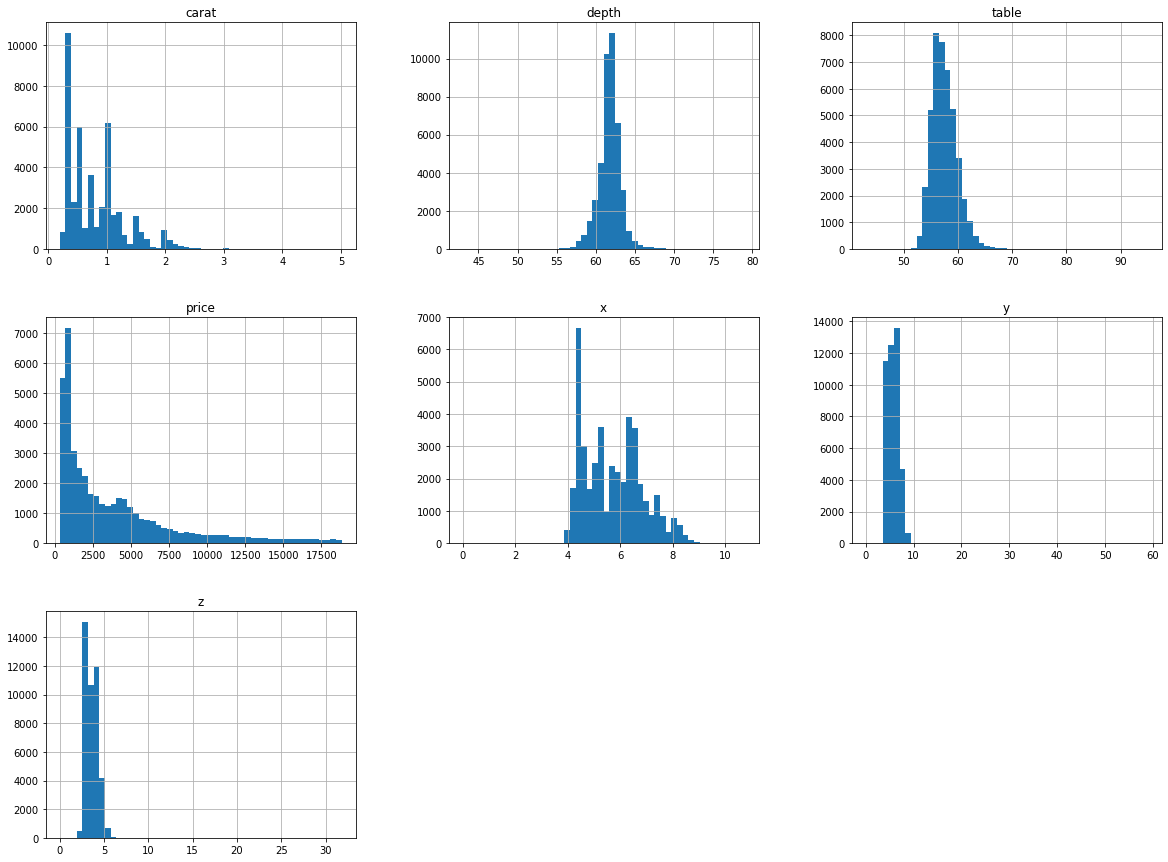

In [ ]:
diamond.hist(bins = 50 , figsize = (20,15))
plt.show()

In [ ]:
corr_matrix = diamond.corr()
corr_matrix["price"].sort_values(ascending = False)

price          1.000000
carat_table    0.925207
carat          0.924931
x              0.890018
z              0.867677
y              0.865766
table          0.136946
depth         -0.015495
Name: price, dtype: float64

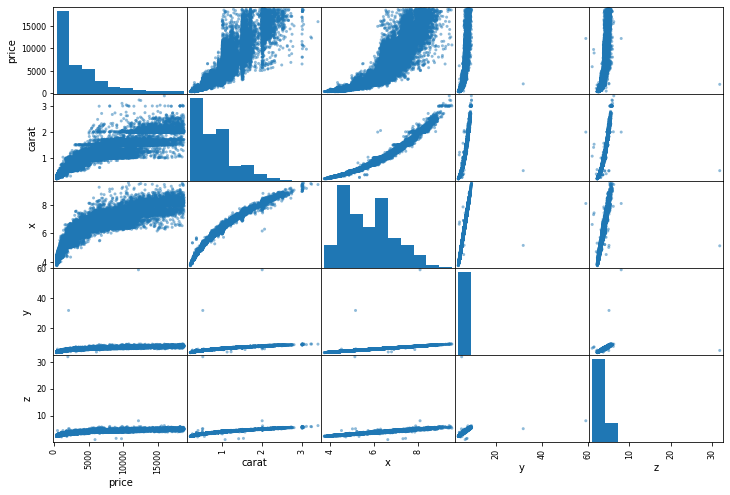

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["price" , "carat" , "x" , "y" , "z"]
scatter_matrix(diamond[attributes], figsize=(12, 8))
plt.show()

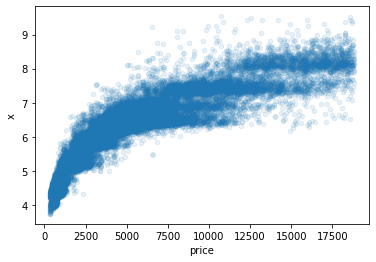

In [ ]:
diamond.plot(kind="scatter", x="price", y="x",alpha=0.1)
plt.show()

In [ ]:
diamond = diamond[(diamond["carat"] < 3.5)]

In [ ]:
diamond = diamond[(diamond["x"] != 0)]
diamond = diamond[(diamond["z"] != 0)]

In [ ]:
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
diamond_labels = diamond[["price"]]
diamond_train = diamond.drop("price" , axis = 1)

In [ ]:
diamond_num = diamond_train.drop("cut" , axis=1)
diamond_num = diamond_num.drop("color" , axis=1)
diamond_num = diamond_num.drop("clarity" , axis=1)
diamond_num

,carat,depth,table,x,y,z
0,0.21,59.8,61.0,3.89,3.84,2.31
1,0.29,62.4,58.0,4.20,4.23,2.63
2,0.31,63.3,58.0,4.34,4.35,2.75
3,0.24,62.8,57.0,3.94,3.96,2.48
4,0.24,62.3,57.0,3.95,3.98,2.47
...,...,...,...,...,...,...
43035,0.72,62.7,59.0,5.69,5.73,3.58
43036,0.72,60.8,57.0,5.75,5.76,3.50
43037,0.72,63.1,55.0,5.69,5.75,3.61
43038,0.86,61.0,58.0,6.15,6.12,3.74


In [ ]:
diamond_cut = diamond[["cut"]]
diamond_color = diamond[["color"]]
diamond_clarity = diamond[["clarity"]]

In [ ]:
diamond_cat = diamond[["cut", "color" , "clarity"]]
diamond_cat

,cut,color,clarity
0,Premium,E,SI1
1,Premium,I,VS2
2,Good,J,SI2
3,Very Good,J,VVS2
4,Very Good,I,VVS1
...,...,...,...
43035,Premium,D,SI1
43036,Ideal,D,SI1
43037,Good,D,SI1
43038,Premium,H,SI2


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ordinal_encoder = OrdinalEncoder()
diamond_cut_encoded = ordinal_encoder.fit_transform(diamond_cut)
diamond_color_encoded = ordinal_encoder.fit_transform(diamond_color)
diamond_clarity_encoded = ordinal_encoder.fit_transform(diamond_clarity)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

diamond_num_tr = num_pipeline.fit_transform(diamond_num)

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
diamond_train

,carat,cut,color,clarity,depth,table,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
1,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
2,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
3,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48
4,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...
43035,0.72,Premium,D,SI1,62.7,59.0,5.69,5.73,3.58
43036,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
43037,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
43038,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [ ]:
num_attribs = list(diamond_num)
cat_attribs1 = ["cut"]
cat_attribs2 = ["color"]
cat_attribs3 = ["clarity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat1", OrdinalEncoder(), cat_attribs1),
        ("cat2", OrdinalEncoder(), cat_attribs2),
        ("cat3", OrdinalEncoder(), cat_attribs3),
    ])

diamond_prepared = full_pipeline.fit_transform(diamond_train)

In [ ]:
diamond_prepared

array([[-1.22402217, -1.3564245 ,  1.590146  , ...,  3.        ,
         1.        ,  2.        ],
       [-1.05690321,  0.45611665,  0.25054492, ...,  3.        ,
         5.        ,  5.        ],
       [-1.01512346,  1.08353474,  0.25054492, ...,  1.        ,
         6.        ,  3.        ],
       ...,
       [-0.15863878,  0.9441085 , -1.08905616, ...,  1.        ,
         0.        ,  2.        ],
       [ 0.1338194 , -0.51986705,  0.25054492, ...,  3.        ,
         4.        ,  3.        ],
       [-0.09596917,  0.31669041, -1.08905616, ...,  2.        ,
         0.        ,  3.        ]])

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(diamond_prepared , diamond_labels)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
diamond_predictions = lin_reg.predict(diamond_prepared)
lin_rmse = mean_squared_error(diamond_labels, diamond_predictions, squared=False)
lin_rmse

1331.8721628176554

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, diamond_prepared, diamond_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(diamond_prepared, diamond_labels)
diamond_predictions = forest_reg.predict(diamond_prepared)
forest_mse = mean_squared_error(diamond_labels, diamond_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


209.1864739752272

In [ ]:
submission = test[["Unnamed: 0"]]
x_test = test.drop("Unnamed: 0" , axis = 1)
x_test_prepared = full_pipeline.transform(x_test)
predictions = forest_reg.predict(x_test_prepared)

submission["price"] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
submission.to_csv("submission.csv" , index = False)

In [ ]:
pd.read_csv("submission.csv")

,Unnamed: 0,price
0,1,408.28
1,3,426.86
2,8,394.98
3,10,407.21
4,12,442.87
...,...,...
10895,53922,2758.38
10896,53923,2950.67
10897,53933,2890.56
10898,53934,2907.12
